In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv("/home/abhineeth/Desktop/movie_casestudy/ml-1m/movies.dat", sep='::', engine='python', names=['MovieID', 'Title', 'Genres'],encoding='ISO-8859-1')
users = pd.read_csv("/home/abhineeth/Desktop/movie_casestudy/ml-1m/users.dat", sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],encoding='ISO-8859-1')
ratings = pd.read_csv("/home/abhineeth/Desktop/movie_casestudy/ml-1m/ratings.dat", sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'],encoding='ISO-8859-1')

ratings_movies = pd.merge(ratings, movies, on='MovieID')

#merging data
df = pd.merge(ratings_movies, users, on='UserID')

print(df.head(5))

   UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         Genres Gender  Age  Occupation Zip-code  
0                         Drama      F    1          10    48067  
1  Animation|Children's|Musical      F    1          10    48067  
2               Musical|Romance      F    1          10    48067  
3                         Drama      F    1          10    48067  
4   Animation|Children's|Comedy      F    1          10    48067  


In [3]:
import pandas as pd

# Load movies.dat from MovieLens 1M dataset
movies = pd.read_csv(
    "/home/abhineeth/Desktop/movie_casestudy/ml-1m/movies.dat",
    sep='::',
    engine='python',
    names=['movieId', 'title', 'genres'],
    encoding='ISO-8859-1'
)

# Save movieId, title, and genres to CSV
movies[['movieId', 'title', 'genres']].to_csv('movies.csv', index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Title       1000209 non-null  object
 5   Genres      1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [5]:
df.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [6]:
df.describe()

,UserID,MovieID,Rating,Timestamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [7]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()
df = df.drop(columns = "Timestamp")
df = df.drop(columns = "Zip-code")
df.columns

Index(['UserID', 'MovieID', 'Rating', 'Title', 'Genres', 'Gender', 'Age',
       'Occupation'],
      dtype='object')

In [8]:
# lowercasing the titles
df.columns = df.columns.str.lower()

In [9]:
df.columns

Index(['userid', 'movieid', 'rating', 'title', 'genres', 'gender', 'age',
       'occupation'],
      dtype='object')

In [10]:
#Extract year from title
df['year'] = df['title'].str.extract(r'\((\d{4})\)')
df['year'] = df['year'].fillna(0).astype(int)

#Remove the year part from title
# df['title'] = df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True).str.strip()

#Ensure 'genres' column is in string format
df['genres'] = df['genres'].astype(str)

#Check for existing genre columns
existing_genre_columns = [col for col in df.columns if col in ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

# Drop any existing genre columns to avoid overlap
df = df.drop(columns=existing_genre_columns, errors='ignore')

#One-hot encoding for genres
genres_dummies = df['genres'].str.get_dummies(sep='|')
df = df.join(genres_dummies)

In [11]:
print(df['title'])

0          One Flew Over the Cuckoo's Nest (1975)
1                James and the Giant Peach (1996)
2                             My Fair Lady (1964)
3                          Erin Brockovich (2000)
4                            Bug's Life, A (1998)
                            ...                  
1000204                Weekend at Bernie's (1989)
1000205                   Crying Game, The (1992)
1000206           Welcome to the Dollhouse (1995)
1000207                    Sophie's Choice (1982)
1000208         E.T. the Extra-Terrestrial (1982)
Name: title, Length: 1000209, dtype: object


In [12]:
# Example: Clipping ratings to be within a certain range
df['rating'] = df['rating'].clip(1, 5)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
print(df.head())
df['gender'].isnull().sum()

   userid  movieid  rating                                   title  \
0       1     1193       5  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3        James and the Giant Peach (1996)   
2       1      914       3                     My Fair Lady (1964)   
3       1     3408       4                  Erin Brockovich (2000)   
4       1     2355       5                    Bug's Life, A (1998)   

                         genres  gender  age  occupation  year  Action  ...  \
0                         Drama       0    1          10  1975       0  ...   
1  Animation|Children's|Musical       0    1          10  1996       0  ...   
2               Musical|Romance       0    1          10  1964       0  ...   
3                         Drama       0    1          10  2000       0  ...   
4   Animation|Children's|Comedy       0    1          10  1998       0  ...   

   Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  \
0        0          0     

0

In [13]:
#saving the preprocessed dataset as csv

df.to_csv('preprocessed_data.csv', index=False)

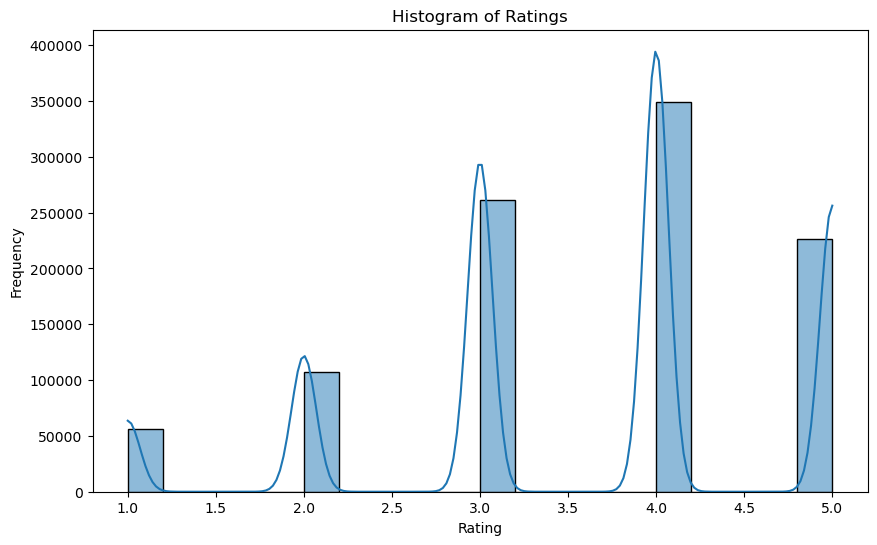

In [14]:
# Load the preprocessed data
df = pd.read_csv('preprocessed_data.csv')

# Histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

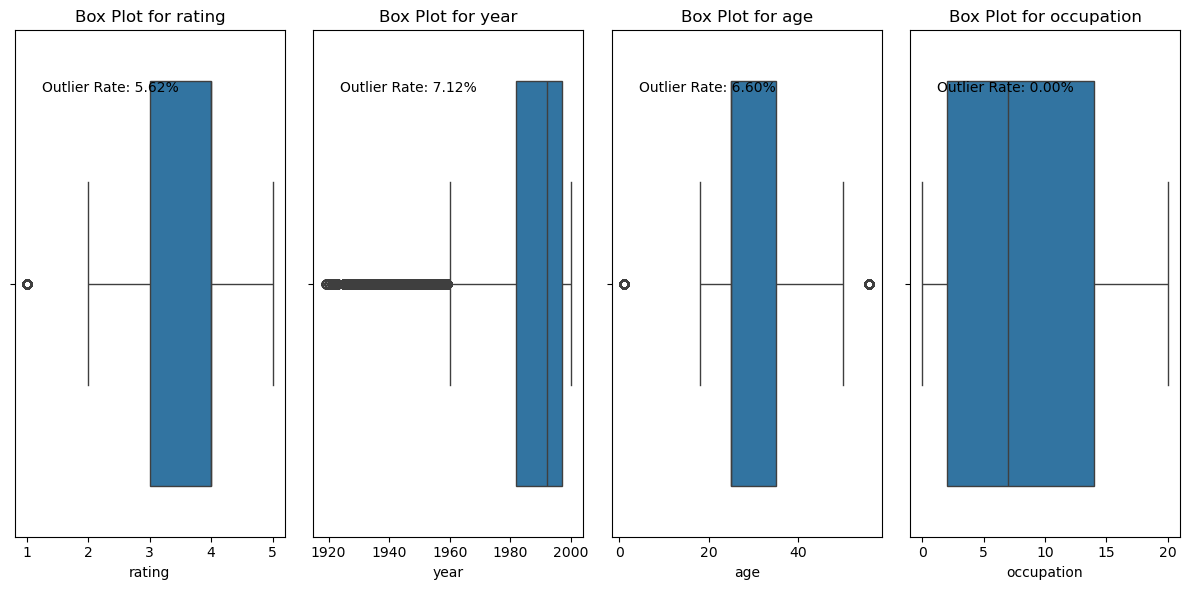

In [15]:
#box plot to check outliers

df = pd.read_csv('preprocessed_data.csv')

# Specify the features to visualize
selected_features = ['rating', 'year','age','occupation']

# Function to calculate outlier rate
def calculate_outlier_rate(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    outlier_rate = outliers.mean()
    return outlier_rate

# Plot boxplots for selected features
plt.figure(figsize=(12, 6))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, len(selected_features), i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)

    # Calculate and annotate outlier rate
    outlier_rate = calculate_outlier_rate(df[feature])
    plt.text(0.1, 0.9, f'Outlier Rate: {outlier_rate:.2%}',
             horizontalalignment='left', verticalalignment='top',
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

features = ['rating', 'year','age','occupation']
for feature in features:
    df = remove_outliers_iqr(df, feature)

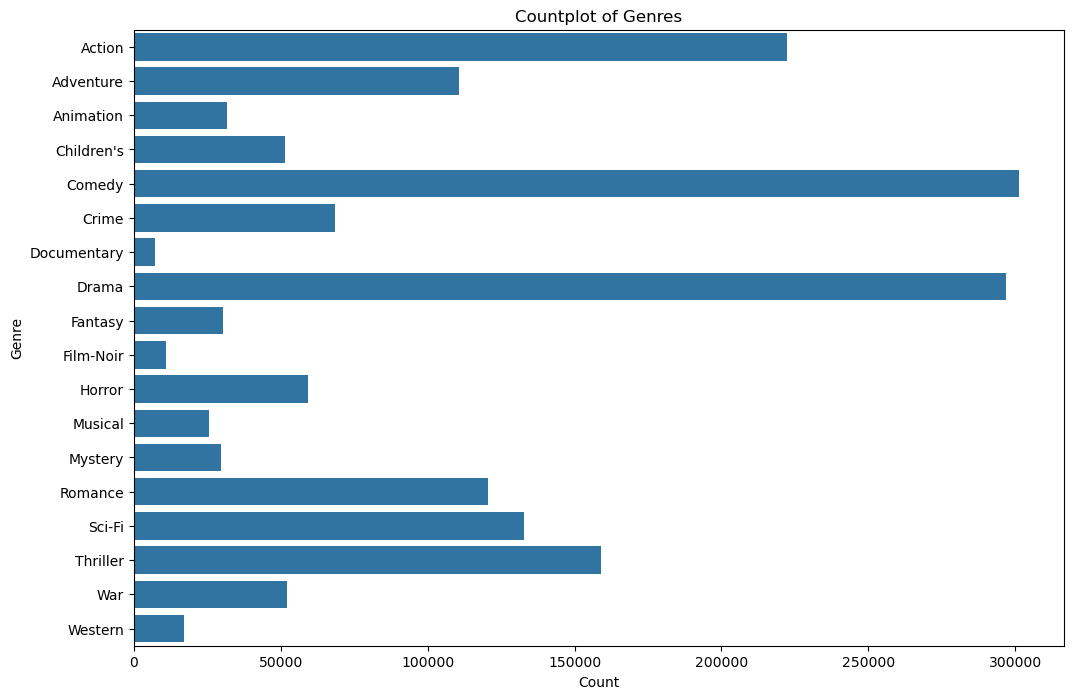

In [17]:
# Create a DataFrame for genre counts
genre_counts = df['genres'].str.get_dummies(sep='|').sum().reset_index()
genre_counts.columns = ['Genre', 'Count']


plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_counts)
plt.title('Countplot of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Numeric Columns: Index(['userid', 'movieid', 'rating', 'gender', 'age', 'occupation', 'year',
       'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


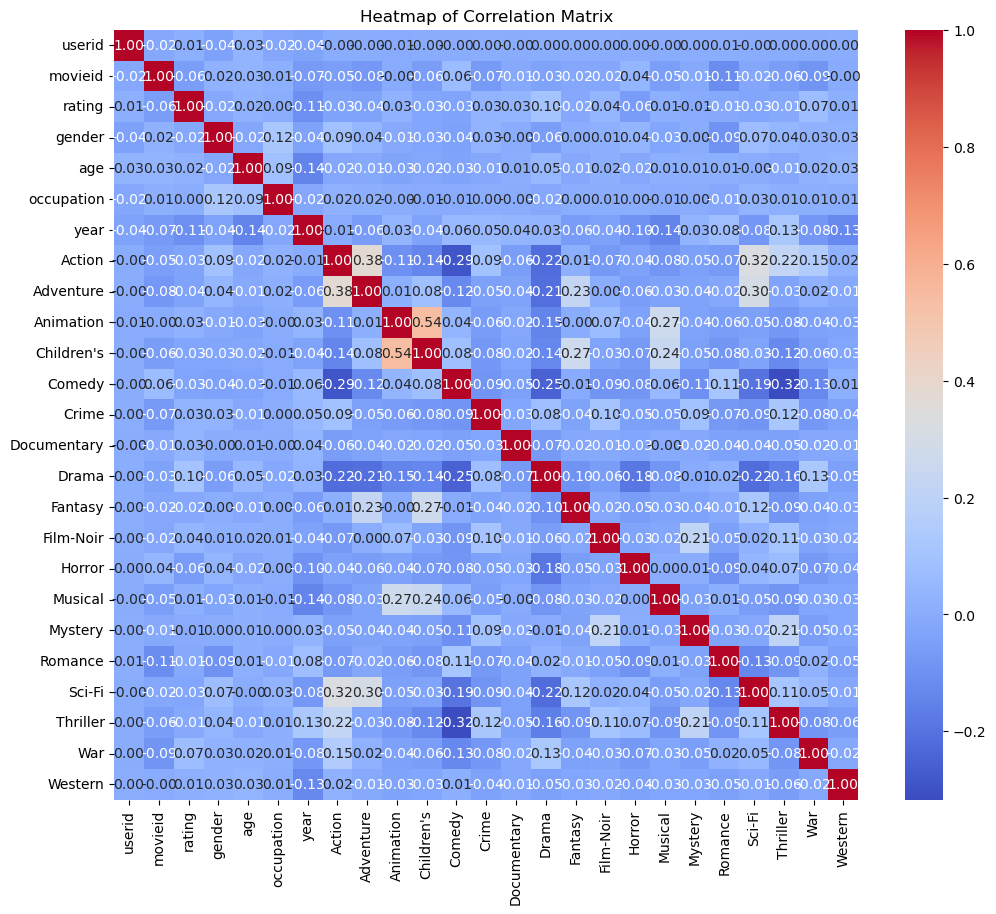

In [18]:
#heatmap
# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns
print("Numeric Columns:", numeric_cols)

# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

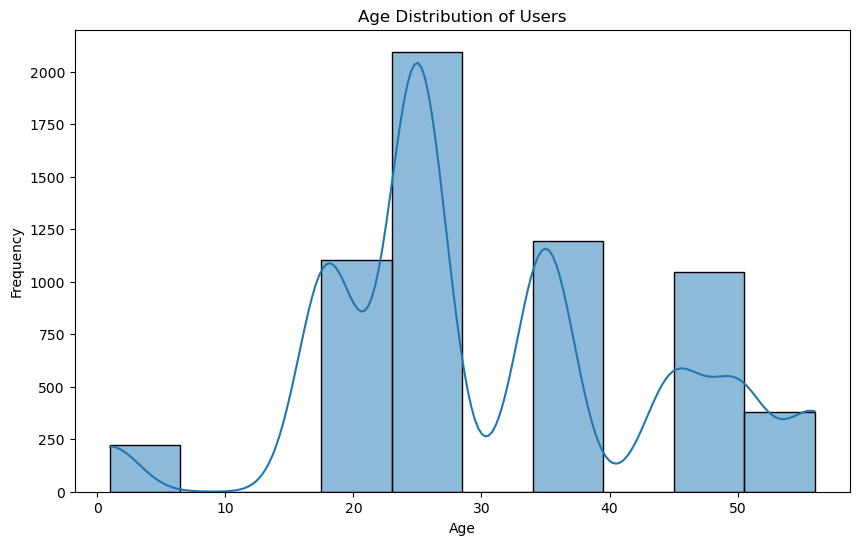

In [19]:
#Analysis of User Demographics

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'], bins=10, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

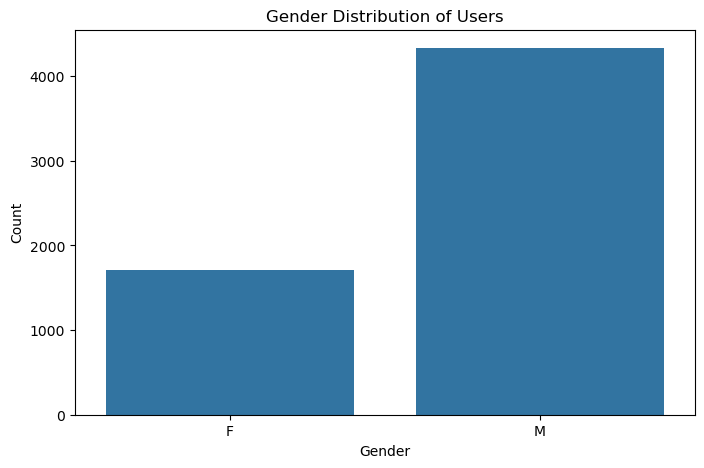

In [20]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=users)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

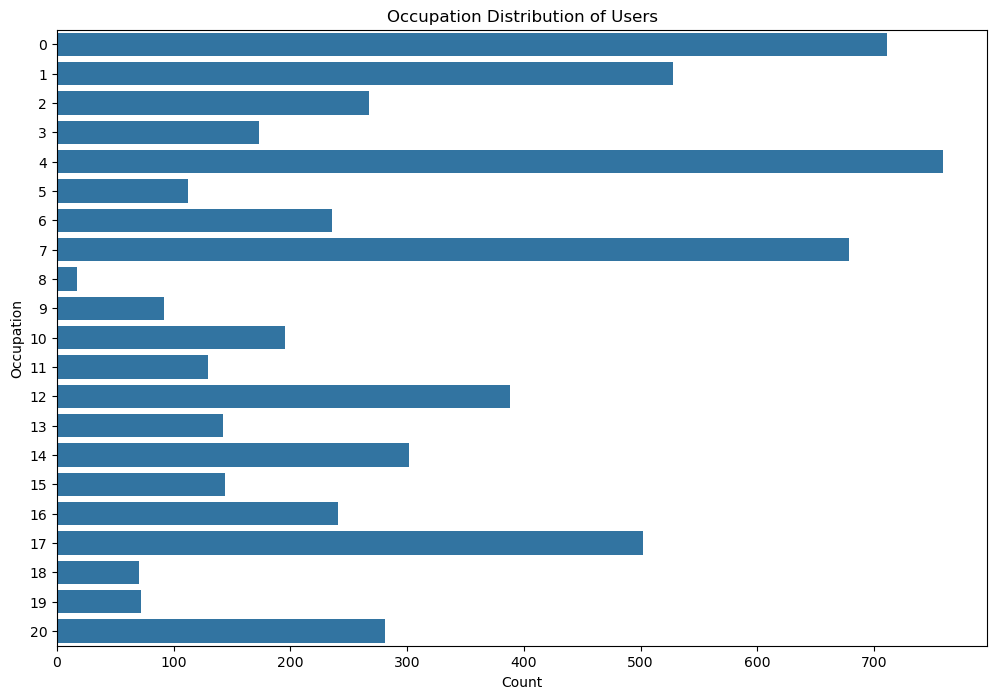

In [21]:
# Occupation Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation', data=users)
plt.title('Occupation Distribution of Users')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

In [22]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_data.csv')

# Define feature columns and target
feature_cols = ['age', 'occupation', 'gender'] + [col for col in df.columns if col.startswith('Action') or col.startswith('Adventure') or col.startswith('Animation') or col.startswith('Children') or col.startswith('Comedy') or col.startswith('Crime') or col.startswith('Documentary') or col.startswith('Drama') or col.startswith('Fantasy') or col.startswith('Film-Noir') or col.startswith('Horror') or col.startswith('IMAX') or col.startswith('Musical') or col.startswith('Mystery') or col.startswith('Romance') or col.startswith('Sci-Fi') or col.startswith('Thriller') or col.startswith('War') or col.startswith('Western')]
X = df[feature_cols]
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Save the model to a file
joblib.dump(model, 'gradient_boosting_model.pkl')

Mean Squared Error: 1.1827001076771524


['gradient_boosting_model.pkl']

In [23]:
# Evaluate the feature-based model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict the ratings on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Feature-Based Model Performance:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Feature-Based Model Performance:
Mean Squared Error (MSE): 1.18
Root Mean Squared Error (RMSE): 1.09
Mean Absolute Error (MAE): 0.89
R-squared (R²): 0.06


In [24]:
print("\n📊 Model Evaluation Summary")
print("-" * 30)
print(f"MSE   : {mse:.3f}")
print(f"RMSE  : {rmse:.3f}")
print(f"MAE   : {mae:.3f}")
print(f"R²    : {r2:.3f}")


📊 Model Evaluation Summary
------------------------------
MSE   : 1.183
RMSE  : 1.088
MAE   : 0.894
R²    : 0.057


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import joblib

# Load the data
df = pd.read_csv('preprocessed_data.csv')

# Encode userId and movieId (if they are not already numeric or continuous)
user_enc = LabelEncoder()
movie_enc = LabelEncoder()

df['user_enc'] = user_enc.fit_transform(df['userid'])
df['movie_enc'] = movie_enc.fit_transform(df['movieid'])

# Define features and target
X = df[['user_enc', 'movie_enc']]
y = df['rating']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

# Save model and encoders
joblib.dump(model, 'regression_model.pkl')
joblib.dump(user_enc, 'user_encoder.pkl')
joblib.dump(movie_enc, 'movie_encoder.pkl')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import joblib

# Load preprocessed data
df = pd.read_csv('preprocessed_data.csv')

# Define features and target variable
features = ['userid', 'age', 'occupation', 'rating', 'gender'] + list(df.columns[df.columns.str.startswith('Action')])
X = df[features]
y = df['movieid']  # Assuming movieId is the target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors
knn.fit(X_train_scaled, y_train)

# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(knn, 'knn_model.pkl')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('preprocessed_data.csv')

# Filter for top 10 most frequent movie IDs (to make classification realistic)
top_movies = df['movieid'].value_counts().nlargest(10).index
df = df[df['movieid'].isin(top_movies)]

# Optional: sample to speed up development
df = df.sample(frac=0.5, random_state=42)

# Encode gender if not already encoded
if df['gender'].dtype == 'object':
    df['gender'] = df['gender'].map({'M': 0, 'F': 1})

# Define features
genre_columns = list(df.columns[df.columns.str.startswith('Action')])  # adjust if genres have other prefixes
features = ['userid', 'age', 'occupation', 'rating', 'gender'] + genre_columns
X = df[features]
y = df['movieid']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation
print("K-Nearest Neighbors - MovieID Classification")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predictions
y_pred_knn = knn.predict(X_test)
# Evaluation
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)*100}')

# Confusion Matrix
confusion_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,3))
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 Score (multi-class, weighted)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("KNN Classifier Evaluation")
print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')

# 5-Fold Cross-Validation Accuracy
cv_accuracy = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
print(f'Cross-Validation Accuracy (5-fold): {cv_accuracy:.4f}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 Score (assuming multi-class classification)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

#cross validation

from sklearn.model_selection import cross_val_score

# Cross-validation for accuracy
cv_accuracy = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

print(f'Cross-Validation Accuracy: {cv_accuracy:.4f}')

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Convert predictions and true values to numeric if needed
y_test_numeric = np.array(y_test)
y_pred_numeric = np.array(y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_numeric))

# Calculate MAE
mae = mean_absolute_error(y_test_numeric, y_pred_numeric)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import pickle

# Load the preprocessed DataFrame
df = pd.read_csv('preprocessed_data.csv')

# Prepare the data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userid', 'movieid', 'rating']], reader)

# Split the data
trainset, testset = train_test_split(data, test_size=0.2)

# Build and train the model
model = SVD()
model.fit(trainset)

# Save the model
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Evaluate the model
predictions = model.test(testset)
accuracy.rmse(predictions)
accuracy.mse(predictions)